### The starting dataset for this jupyter notebook is the official UC Irvine Repository Heart Disease Cleveland data found on their website.

### Another jupyter notebook was shared consisting only of preprocessing of the data the assistant shared with us at the final auditory exercises. There, the assistant's data was transformed to be completely equivalent to the starting dataset here.

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
#loading originally-processed Cleveland dataset form the UC Irvine repository
filepath=r"C:\Users\ONE\OneDrive - FFUNIZG\Radna površina\Faks\CogSci\DataScience\BartolProjekt\Data\UCI heart\processed.cleveland.data"
data=pd.read_csv(filepath, header=None)

In [7]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
data.shape

(303, 14)

In [10]:
#renaming columns so that they match names in article
data.columns = ["Age", "Sex", "CP", "RestBP", "Chol", "FBS", "RestECG", "HeartBeat", "Exang", "OldPeak", "Slope", "CA", "Thal", "Target"]

### Data understanding

In [19]:
#displaying data information with data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    float64
 1   Sex        303 non-null    float64
 2   CP         303 non-null    float64
 3   RestBP     303 non-null    float64
 4   Chol       303 non-null    float64
 5   FBS        303 non-null    float64
 6   RestECG    303 non-null    float64
 7   HeartBeat  303 non-null    float64
 8   Exang      303 non-null    float64
 9   OldPeak    303 non-null    float64
 10  Slope      303 non-null    float64
 11  CA         303 non-null    object 
 12  Thal       303 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [20]:
#for uppermost row
data_types = data.iloc[0].map(type)
print(data_types)

Age          <class 'numpy.float64'>
Sex          <class 'numpy.float64'>
CP           <class 'numpy.float64'>
RestBP       <class 'numpy.float64'>
Chol         <class 'numpy.float64'>
FBS          <class 'numpy.float64'>
RestECG      <class 'numpy.float64'>
HeartBeat    <class 'numpy.float64'>
Exang        <class 'numpy.float64'>
OldPeak      <class 'numpy.float64'>
Slope        <class 'numpy.float64'>
CA                     <class 'str'>
Thal                   <class 'str'>
Target         <class 'numpy.int64'>
Name: 0, dtype: object


In [13]:
#checking for missing values in each column-feature
data.isna().sum()

Age          0
Sex          0
CP           0
RestBP       0
Chol         0
FBS          0
RestECG      0
HeartBeat    0
Exang        0
OldPeak      0
Slope        0
CA           0
Thal         0
Target       0
dtype: int64

In [11]:
#descriptive data statistics
data.describe()

,Age,Sex,CP,RestBP,Chol,FBS,RestECG,HeartBeat,Exang,OldPeak,Slope,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [18]:
#comparing whether number of unique values fit those described in the article
data.nunique()

Age           41
Sex            2
CP             4
RestBP        50
Chol         152
FBS            2
RestECG        3
HeartBeat     91
Exang          2
OldPeak       40
Slope          3
CA             5
Thal           4
Target         5
dtype: int64

In [24]:
#values for CA in the article as stated as 0,1,2,3
#also CA should be numeric but, as shown above, is of string type
data.CA.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [37]:
data.CA.value_counts()

CA
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [25]:
#Thal should be numeric but is of string type
#values for Thal stated in the article are 0,1,2,3
data.Thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [39]:
data.Thal.value_counts()

Thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

In [41]:
#Target values should be binary coded 
data.Target.unique()

array([0, 2, 1, 3, 4], dtype=int64)

## Data preprocessing

In [42]:
#creating a copy of the dataset to be manipulated
data_tmp = data.copy()

### Inputting missing values using K Nearest Neighbor (KNN) method.

In [67]:
#filtering rows with values "?" in any of the columns
data_filter = data_tmp[~(data_tmp == '?').any(axis=1)]

Mirroring the procedure in the article, missing data is replaced using the K Nearest Neighbor algorithm. Alternatively, the few examples (6) containing missing values could have been dropped instead of replaced (which is exactly what the code cell above does) and the following sequence implementing KNN would have been skipped.

In [68]:
data_filter.shape

(297, 14)

In [69]:
#eliminating Target variable from KNeighbors prediction to avoid future spuriosity (bias)
X = data_filter.loc[:, data_tmp.columns != "Target"]

In [70]:
X.shape

(297, 13)

In [95]:
#rows with ? value in CA column with removed Target and CA columns
rows_CA_question = data_tmp.loc[data_tmp.CA == "?", data_tmp.columns != "Target"]
rows_CA_question = rows_CA_question.loc[:, rows_CA_question.columns != "CA"]

In [96]:
#rows with ? value in Thal column with removed Target and Thal columns
rows_Thal_question = data_tmp.loc[data_tmp.Thal == "?", data_tmp.columns != "Target"]
rows_Thal_question = rows_Thal_question.loc[:, rows_Thal_question.columns != "Thal"]

#### Fitting KNeighborsClassifier to predict CA values

In [87]:
X_ca = X.loc[:, X.columns != "CA"]

In [88]:
y_ca = data_filter.CA

In [89]:
#KNeighborsClassifier with n_neighbors parameter set to default 5
knn_ca = KNeighborsClassifier()

In [90]:
knn_ca.fit(X_ca,y_ca)

C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_spar

KNeighborsClassifier()

In [99]:
CA_predict = knn_ca.predict(rows_CA_question)

C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [100]:
data_tmp.loc[data_tmp.CA == "?", "CA"] = CA_predict

In [114]:
data_tmp.CA.value_counts()

CA
0.0    179
1.0     66
2.0     38
3.0     20
Name: count, dtype: int64

#### Fitting KNeighborsClassifier to predict Thal values

In [107]:
X_Thal = X.loc[:, X.columns != "Thal"]

In [108]:
y_Thal = data_filter.Thal 

In [109]:
#KNeighborsClassifier with n_neighbors parameter set to default 5
knn_Thal = KNeighborsClassifier()

In [110]:
knn_Thal.fit(X_Thal, y_Thal)

C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_spar

KNeighborsClassifier()

In [112]:
Thal_predict = knn_Thal.predict(rows_Thal_question)

C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ONE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [113]:
data_tmp.loc[data_tmp.Thal == "?", "Thal"] = Thal_predict

In [115]:
data_tmp.Thal.value_counts()

Thal
3.0    167
7.0    118
6.0     18
Name: count, dtype: int64

### Transforming variables to match the article

In [124]:
#transforming Thal and CA variables to float
data_tmp["CA"]=data_tmp["CA"].astype(float)
data_tmp["Thal"]=data_tmp["Thal"].astype(float)

In [135]:
#Values of Thal are recoded so as to match the article.
Thal_article = [1,2,3]
Thal_val = sorted(data_tmp.Thal.unique())
for i, j in zip(Thal_val, Thal_article):
    data_tmp.loc[data_tmp["Thal"] == i, "Thal"] = j

In [137]:
#Target Variable is bindary recoded
#according to UC Irvine repository: [1,2,3,4] becomes 1, while values 0 remain.
data_tmp.loc[data_tmp["Target"].isin(range(1,5)), "Target"]=1

## Data visualization

In [146]:
#separating continuous and categoric variables
columns_cont = ["Age", "RestBP", "Chol", "HeartBeat", "OldPeak"]
data_cont = data_tmp.loc[:, columns_cont]
data_categ = data_tmp.loc[:, ~data_tmp.columns.isin(columns_cont)]

In [178]:
feat_list = columns_cont + ["Target"]

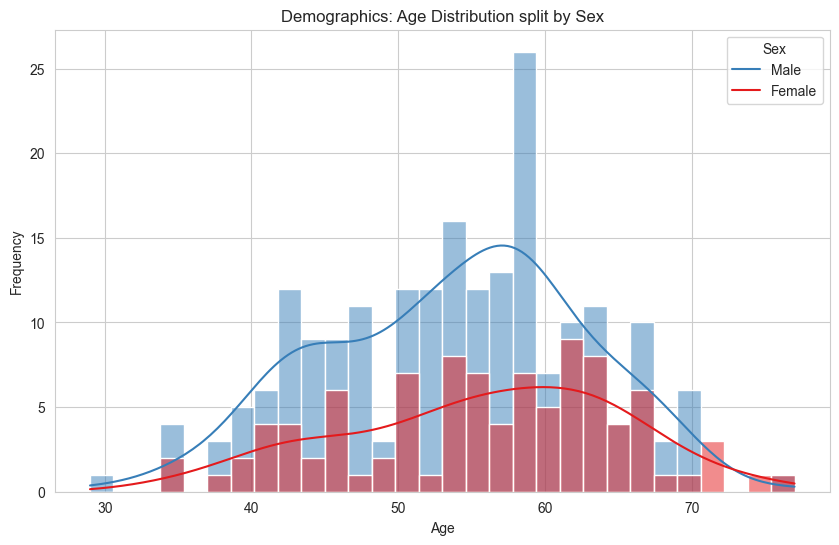

In [250]:
#the relationship between fundamental demographic characteristics of the patients is displayed
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', hue='Sex', bins=30, kde=True, palette='Set1')
plt.title('Demographics: Age Distribution split by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

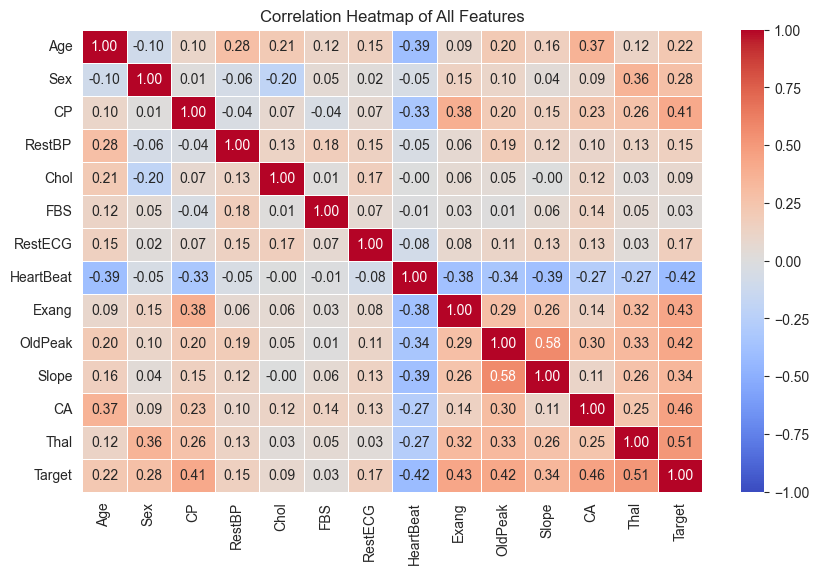

In [251]:
correlation_matrix = data_tmp.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1)
plt.title('Correlation Heatmap of All Features')
plt.show()

The correlation between all the dataset features is displayed. This provides us with a global overview of the relationships in the feature space.

Features which correlate more strongly with all the other variables can be identified by comparing either columns of rows. Additionally, specific pair-relations can be chosen for further inspection or analysis. 

Finally, we gain a rough estimate and comparison of the connections of all the features to the all-important target-variable.

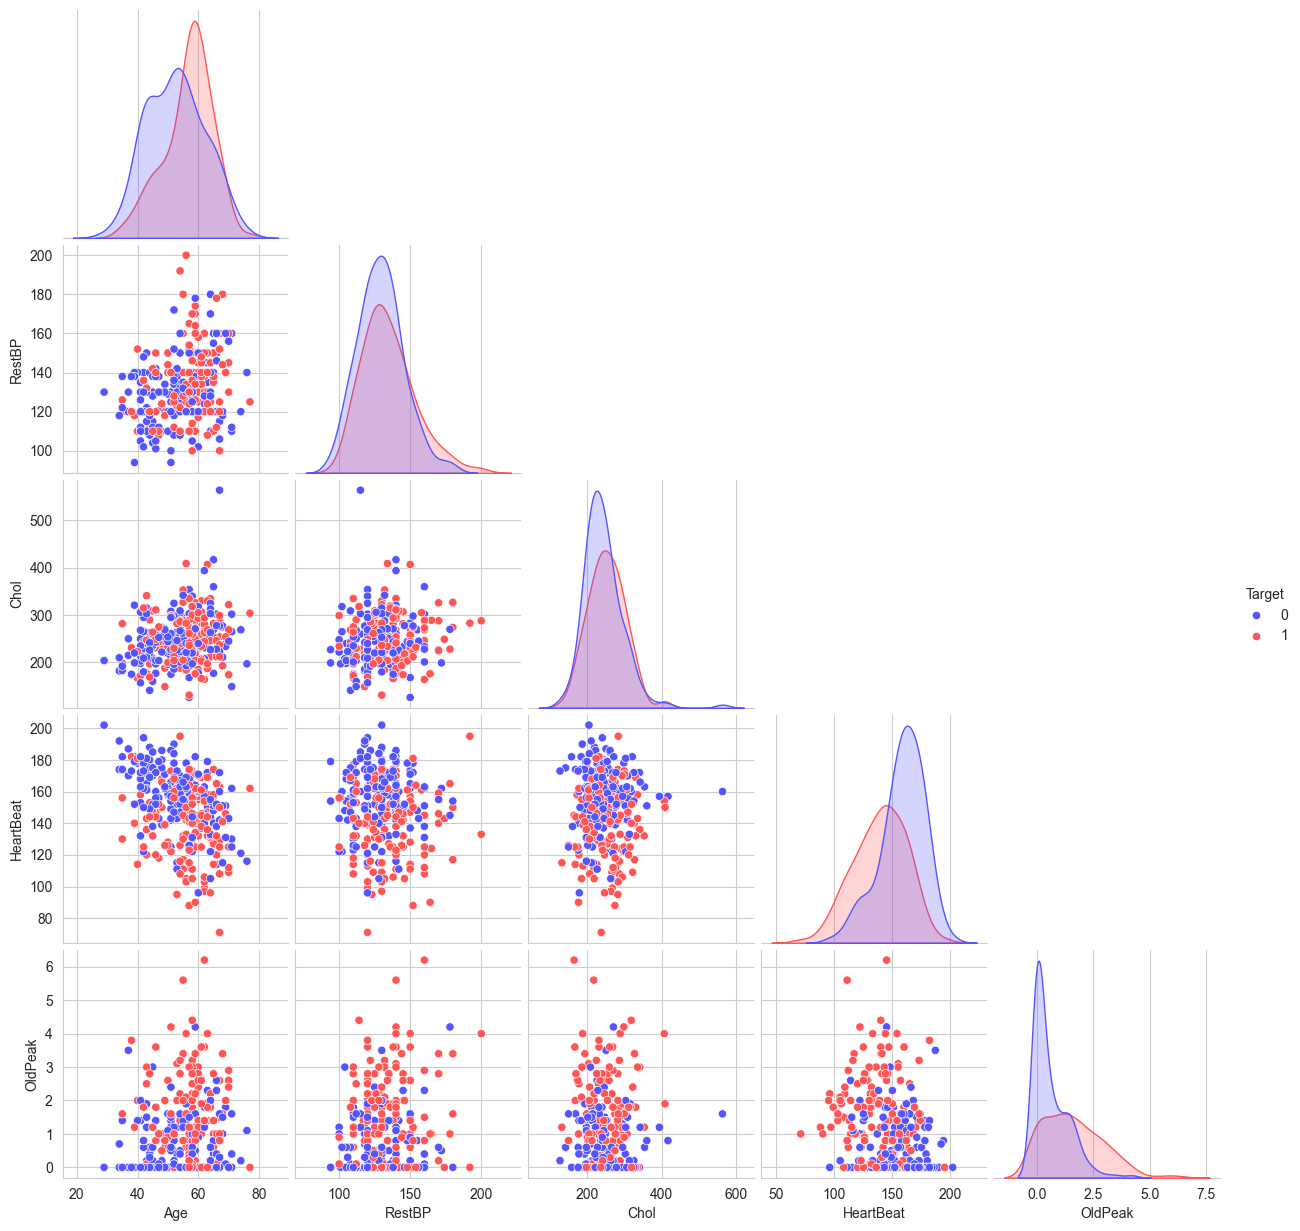

In [310]:
sns.pairplot(data_tmp[feat_list], hue='Target', palette='seismic', corner=True)
plt.show()

The pairplot displayed above shows the scatterplots for all the numeric feature combinations as well as their individual distributions.

Based on scatterplots containing the OldPeak variable and its distribution, a further analysis of this variable is deemed necessary to understand its distribution.

Additionally, potential outliers in all the variables can be spotted based on the graph.

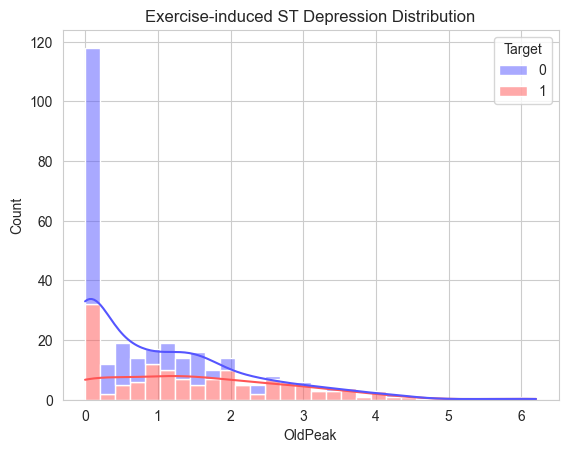

In [308]:
sns.set_style("whitegrid")
sns.histplot(data=data_tmp, x="OldPeak", bins=30, kde=True, palette="seismic", hue="Target", element="bars", stat="count", multiple="stack")
plt.title("Exercise-induced ST Depression Distribution")
plt.show()

The OldPeak variable, based on the official dataset description on UC Irvine ML Repository webpage (https://archive.ics.uci.edu/dataset/45/heart+disease), represents "ST depression induced by exercise relative to rest" where ST is a specific shape in electrocardiography.

Since the feature codes a depression relative to rest, we can postulate that 0 values represent ST depression not occurring during electrocardiography (possibly substituted by ST elevation). Since ST depression is theoretically connected to heart failure (i.e. since it is a bad thing) this conclusion about 0-values is consistent with the finding that, in our dataset, as shown in the histogram above, the number of 0 values is more dominant in the subpopulation having target value 0 (not having heart failure - blue in graph) than those having heart failure (target 1 - red in graph).

All the occurrences of the 0-value are therefore left in the dataset untouched, just as in the article analysed here.

In [238]:
(data_tmp["OldPeak"]==0).sum()

99

In [296]:
data_tmp[data_tmp["OldPeak"]==0].groupby("Target").Age.count()

Target
0    73
1    26
Name: Age, dtype: int64

In [297]:
data_tmp.Target.value_counts()

Target
0    164
1    139
Name: count, dtype: int64

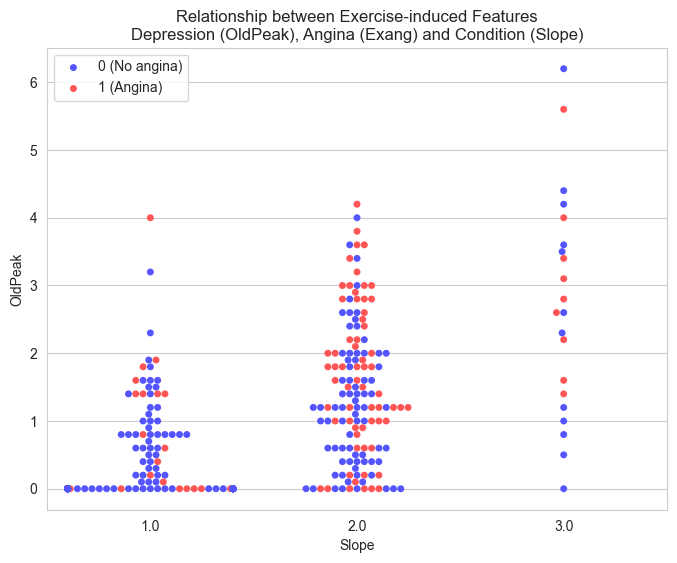

In [258]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Slope', y='OldPeak', data=data_tmp, hue='Exang', palette='seismic')
plt.title('Relationship between Exercise-induced Features\nDepression (OldPeak), Angina (Exang) and Condition (Slope)')
plt.legend(labels=["0 (No angina)", "1 (Angina)"])
plt.show()

The swarmplot above displays simultaneously the relationship between the three variables related to exercise: OldPeak codes for (as described in detail above) ST depression induced by exercies relative to rest, Slope represent "the slope of the peak exercies ST segment" while exang separates those who have exercise induced angina from those who don't.

The fact that the variables all pertain to exercise and especially to the ST pattern in electrocardiography justifies further analysis into the tightness of the relationship between this variables.

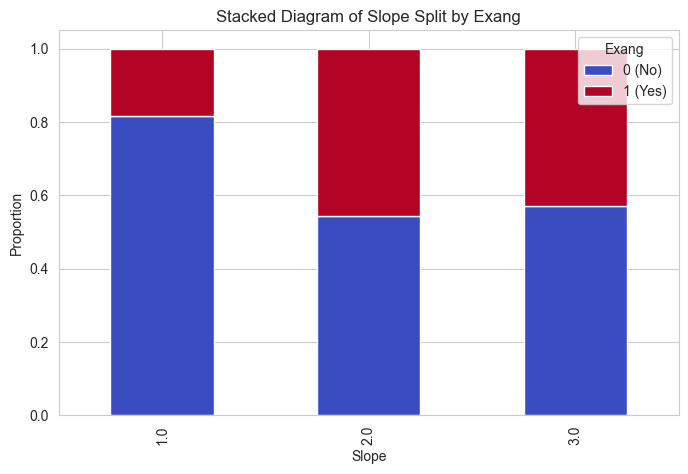

In [311]:
slope_exang_counts = pd.crosstab(data['Slope'], data['Exang'])
slope_exang_counts_normalized = slope_exang_counts.div(slope_exang_counts.sum(axis=1), axis=0)

slope_exang_counts_normalized.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 5))
plt.title('Stacked Diagram of Slope Split by Exang')
plt.xlabel('Slope')
plt.ylabel('Proportion')
plt.legend(title="Exang", labels=['0 (No)', '1 (Yes)'])
plt.show()

The stacked diagram above is somewhat redundant (since all the information in the diagram can be deduced from the swarmplot directly above) but is shown to emphasize the relationship between the Slope and Angina.

Angina being more prevalent in groups with Slope-values 2 and 3 than in Slope-1 group may indicate a relationshi between the variables which is not visible from the correlation coefficient in the heatmap above. This stresses perfectly the importance of reviewing variable relationships using multiple techniques, metrics and visualizations.

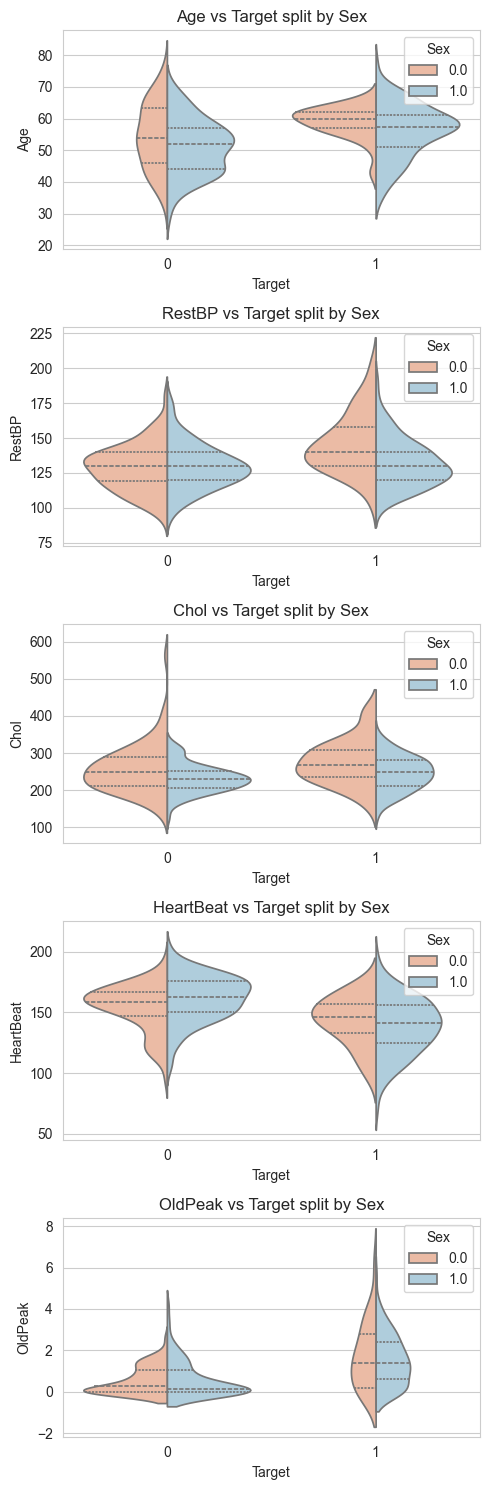

In [316]:
#violin plot of continuous variables split by Target value and Sex

num_plots = len(columns_cont)
fig, axes = plt.subplots(num_plots, 1, figsize=(5, 15))

for i, feature in enumerate(columns_cont):
    sns.violinplot(x='Target', y=feature, hue="Sex", split=True, data=data_tmp, ax=axes[i], palette="RdBu", inner="quartile")
    axes[i].set_title(f'{feature} vs Target split by Sex')

plt.tight_layout()
plt.show()

Violin plot distributions for all the numeric variables are displayed, split by Target (Heart Failure) and Sex.

The distribution provides us with insight into the difference between the Heart Failure and No Heart Failure groups for different variables.

Additionally, based on its long-tailed structure, potential outliers in the Chol (Cholesterol) variable are chosen to be further inspected.

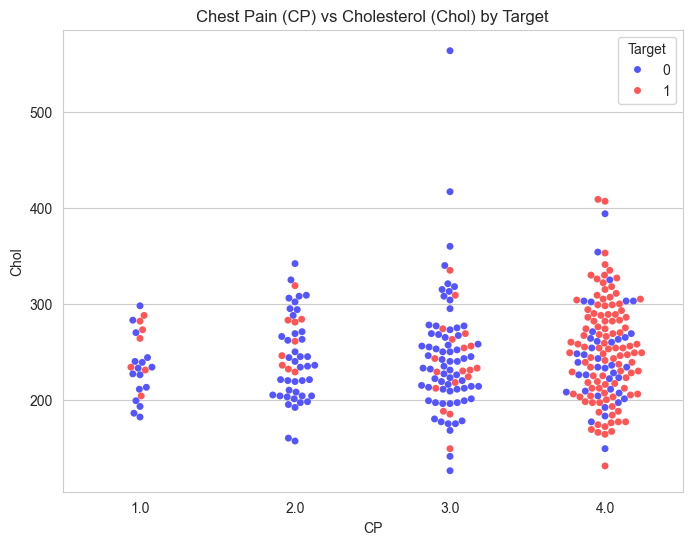

In [299]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='CP', y='Chol', data=data_tmp, hue='Target', palette='seismic')
plt.title('Chest Pain (CP) vs Cholesterol (Chol) by Target')
plt.show()

Potential outliers in the Cholesterol variable identified in the violinplot are here inspected using a swarmplot investigating its relationship to Chest Pain split by Heart Failure (Target). 

Some outlying datapoints are visible, with one being especially prominent.

In [319]:
#row representing Chol value outlier
out_chol=data_tmp[data_tmp.Chol>500]
out_chol

,Age,Sex,CP,RestBP,Chol,FBS,RestECG,HeartBeat,Exang,OldPeak,Slope,CA,Thal,Target
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,3.0,0


In [197]:
#Chol outlier z-value
out_chol_z=(out_chol.Chol-data_tmp.Chol.mean())/data_tmp.Chol.std()
print(out_chol_z)

152    6.128347
Name: Chol, dtype: float64


The outlying datapoint is located in the dataset, isolated and its z-score value calculated. Following the procedure in the article, although peripheral in its Chol value, the element is judged to be valid for keeping in the dataset.

#### Further data visualization is hidden below. These visualization strategies were used during the process of data inspection to gain insight into which ones will me most information-rich. Most of the information contained in the graphs below is redundant as it was alternatively shown in the graphs displayed above (a two-variable jointplot for example, is fully contained within the all-the-variables swarmplot).

Histogram of Chest Pain Type split by Heart Failure

In [322]:
#cp_target_counts = pd.crosstab(data_tmp['CP'], data_tmp['Target'])
#cp_target_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 6))
#plt.title('Chest Pain Type Split by Target')
#plt.xlabel('Chest Pain Type')
#plt.ylabel('Frequency')
#plt.legend(title='Target', labels=['No Heart Failure (0)', 'Heart Failure (1)'])
#plt.show()

Histogram of RestBP, Chol, HeartBeat individual variable distributions

In [324]:
#sns.set_style("whitegrid")

#fig, axes = plt.subplots(1,3, figsize=(16,5), sharey=True)

#feat_hist = ["RestBP", "Chol", "HeartBeat"]
#colors = ["darkgreen", "darkorange", "steelblue"]

#for feature, color, i in zip(feat_hist, colors, range(3)):
#    sns.histplot(data_tmp[feature], bins=30, ax=axes[i], kde=True, color=color)
#    axes[i].set_title(f"{feature} Distribution")

#plt.tight_layout()
#plt.show()

Jointplot of Chol and RestBP

In [270]:
#sns.jointplot(data=data_tmp, x="Chol", y="RestBP", hue="Target")
#plt.show()

Scatterplot of Age, Chol, HeartBeat variable pairings.

In [271]:
#fig, axes = plt.subplots(1, 3, figsize=(16, 5))

#sns.scatterplot(x='Age', y='Chol', data=data, ax=axes[0], color='crimson', alpha=0.6)
#axes[0].set_title('Age vs Cholesterol')
#sns.scatterplot(x='Age', y='HeartBeat', data=data, ax=axes[1], color='orange', alpha=0.8)
#axes[1].set_title('Age vs HeartBeat')
#sns.scatterplot(x='Chol', y='HeartBeat', data=data, ax=axes[2], color='lightskyblue', alpha=0.8)
#axes[2].set_title('Cholesterol vs HeartBeat')

#plt.tight_layout()
#plt.show()